# Ch6 Linear Model Selection and Regularization

In [2]:
#load modules
import pandas as pd
from sklearn.linear_model import LinearRegression
from mlxtend.feature_selection import ExhaustiveFeatureSelector as EFS
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
from mlxtend.feature_selection import SequentialFeatureSelector as sfs
from sklearn.model_selection import train_test_split

In [3]:
#load credit card dataset
credit = pd.read_csv('Dataset/Credit.csv', index_col =0)
credit.head()
credit.Ethnicity.value_counts()

Caucasian           199
Asian               102
African American     99
Name: Ethnicity, dtype: int64

In [4]:
#convert the categorical variables
credit_dummies = pd.get_dummies(credit[['Gender', 'Student', 'Married', 'Ethnicity']])
credit =credit.drop(credit[['Gender', 'Student', 'Married', 'Ethnicity']],axis=1)
credit_dummies =credit_dummies.drop(['Gender_Female', 'Student_No', 'Married_No', 'Ethnicity_African American'],axis=1)
credit_df= pd.concat([credit, credit_dummies], axis=1)
credit_df.head()

#mark the predictors and respond variables
X= credit_df[['Income', 'Limit', 'Rating', 'Cards', 'Age', 'Education', 'Gender_Male', 'Student_Yes', 'Married_Yes', 'Ethnicity_Asian', 'Ethnicity_Caucasian']]
y= credit_df.Balance


## Best Subset Selection

In [5]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

def fit_ols(X,y):
    ols = LinearRegression()
    ols_model =ols.fit(X,y)
    RSS= round(mean_squared_error(y,ols_model.predict(X)) * len(y),2)
    R_square = round(ols_model.score(X,y),2)
    return RSS, R_square

In [6]:
fit_ols(X,y)

(3786730.19, 0.96)

In [7]:
import itertools
from tqdm import tnrange, tqdm_notebook
k = 11
RSS_list, R_squared_list, feature_list = [],[], []
numb_features = []

#Looping over k = 1 to k = 11 features in X
for k in range(1,len(X.columns) + 1):
    #Looping over all possible combinations: from 11 choose k
    for combo in itertools.combinations(X.columns,k):
        tmp_result = fit_ols(X[list(combo)],y)   #Store temp result b
        RSS_list.append(tmp_result[0])                  #Append lists
        R_squared_list.append(tmp_result[1])
        feature_list.append(combo)
        numb_features.append(len(combo))   

#Store in DataFrame
df = pd.DataFrame({'numb_features': numb_features,'RSS': RSS_list, 'R_squared':R_squared_list,'features':feature_list})

In [8]:
df['min_RSS'] = df.groupby('numb_features')['RSS'].transform(min)
df['max_R_squared'] = df.groupby('numb_features')['R_squared'].transform(max)

## Figure 6.1

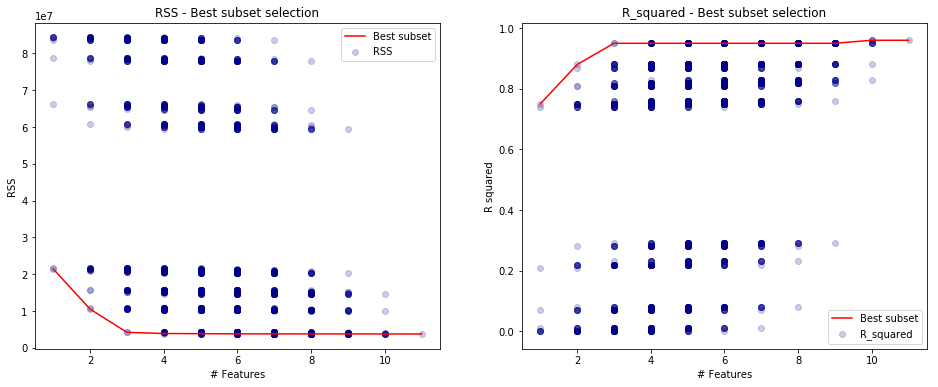

In [9]:
fig = plt.figure(figsize = (16,6))
ax = fig.add_subplot(1, 2, 1)

ax.scatter(df.numb_features,df.RSS, alpha = .2, color = 'darkblue' )
ax.set_xlabel('# Features')
ax.set_ylabel('RSS')
ax.set_title('RSS - Best subset selection')
ax.plot(df.numb_features,df.min_RSS,color = 'r', label = 'Best subset')
ax.legend()

ax = fig.add_subplot(1, 2, 2)
ax.scatter(df.numb_features,df.R_squared, alpha = .2, color = 'darkblue' )
ax.plot(df.numb_features,df.max_R_squared,color = 'r', label = 'Best subset')
ax.set_xlabel('# Features')
ax.set_ylabel('R squared')
ax.set_title('R_squared - Best subset selection')
ax.legend()

plt.show()

## Forward Stepwise

In [10]:
# one variable
ols = LinearRegression()
sfs1 = sfs(ols,
           k_features=1,
           forward=True,
           floating=False,
           verbose=2,
           scoring='neg_mean_squared_error',
           cv=5)
sfs1.fit(X, y)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  11 out of  11 | elapsed:    0.1s finished

[2019-06-02 18:55:43] Features: 1/1 -- score: -54293.17658429352

SequentialFeatureSelector(clone_estimator=True, cv=5,
             estimator=LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False),
             floating=False, forward=True, k_features=1, n_jobs=1,
             pre_dispatch='2*n_jobs', scoring='neg_mean_squared_error',
             verbose=2)

In [11]:
# two variables
sfs2 = sfs(ols,
           k_features=2,
           forward=True,
           floating=False,
           verbose=2,
           scoring='neg_mean_squared_error',
           cv=5)
sfs2.fit(X, y)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  11 out of  11 | elapsed:    0.1s finished

[2019-06-02 18:55:46] Features: 1/2 -- score: -54293.17658429352[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.0s finished

[2019-06-02 18:55:46] Features: 2/2 -- score: -26775.95426714271

SequentialFeatureSelector(clone_estimator=True, cv=5,
             estimator=LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False),
             floating=False, forward=True, k_features=2, n_jobs=1,
             pre_dispatch='2*n_jobs', scoring='neg_mean_squared_error',
             verbose=2)

In [12]:
# three variable
sfs3 = sfs(ols, k_features =3, forward =True, floating =False, verbose= 2, scoring = 'neg_mean_squared_error', cv=5)
sfs3.fit(X,y)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  11 out of  11 | elapsed:    0.1s finished

[2019-06-02 18:55:47] Features: 1/3 -- score: -54293.17658429352[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.0s finished

[2019-06-02 18:55:47] Features: 2/3 -- score: -26775.95426714271[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    0.0s finished

[2019-06-02 18:55:47] Features: 3/3 -- score: -10851.452873513992

SequentialFeatureSelector(clone_estimator=True, cv=5,
             estimator=LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False),
             floating=False, forward=True, k_features=3, n_jobs=1,
             pre_dispatch='2*n_jobs', scoring='neg_mean_squared_error',
             verbose=2)

In [13]:
# four variables
sfs4 = sfs(ols, k_features =4, forward =True, floating =False, verbose= 2, scoring = 'neg_mean_squared_error', cv=5)
sfs4.fit(X,y)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  11 out of  11 | elapsed:    0.1s finished

[2019-06-02 18:55:47] Features: 1/4 -- score: -54293.17658429352[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.0s finished

[2019-06-02 18:55:47] Features: 2/4 -- score: -26775.95426714271[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    0.0s finished

[2019-06-02 18:55:47] Features: 3/4 -- score: -10851.452873513992[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1

SequentialFeatureSelector(clone_estimator=True, cv=5,
             estimator=LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False),
             floating=False, forward=True, k_features=4, n_jobs=1,
             pre_dispatch='2*n_jobs', scoring='neg_mean_squared_error',
             verbose=2)

In [14]:
dat= [['one variable', sfs1.k_feature_names_],['two variables', sfs2.k_feature_names_], ['three variables', sfs3.k_feature_names_], ['four variables', sfs4.k_feature_names_]]

In [15]:
dat_df= pd.DataFrame(dat, columns=['Number of Variables','Forward stepwise Selection'])

In [16]:
dat_df

,Number of Variables,Forward stepwise Selection
0,one variable,"(Rating,)"
1,two variables,"(Income, Rating)"
2,three variables,"(Income, Rating, Student_Yes)"
3,four variables,"(Income, Limit, Rating, Student_Yes)"


Other techniques used to adjust the training erorr for the model size: Cp, AIC, BIC, adjusted R square

Now I am going to use the following Mallow's Cp definition to create figure 6.2

[This blog](https://xavierbourretsicotte.github.io/subset_selection.html) gives better explaination of Mallow's Cp and other common variable selection techniques

$$C_p = \frac{1}{m} (RSS+ 2d\sigma^2) $$

In [18]:

#define RSS
def fit_linear_reg(X,Y):
    #Fit linear regression model and return RSS and R squared values
    model_k = LinearRegression(fit_intercept = True)
    model_k.fit(X,Y)
    RSS = mean_squared_error(Y,model_k.predict(X)) * len(Y)
    #MSE = mean_squared_error(Y,model_k.predict(X))
    return RSS

In [20]:
#Importing tqdm for the progress bar
from tqdm import tnrange, tqdm_notebook

#Initialization variables

k = 11
RSS_list, feature_list = [],[]
numb_features = []

#Looping over k = 1 to k = 11 features in X
for k in range(1,len(X.columns) + 1):

    #Looping over all possible combinations: from 11 choose k
    for combo in itertools.combinations(X.columns,k):
        tmp_result = fit_linear_reg(X[list(combo)],y)   #Store temp result 
        RSS_list.append(tmp_result) #Append lists
        feature_list.append(combo)
        numb_features.append(len(combo))   

#Store in DataFrame
df = pd.DataFrame({'numb_features': numb_features,'RSS': RSS_list,'features':feature_list})

In [22]:
df.head()
    

,numb_features,RSS,features
0,1,6.620874e+07,"(Income,)"
1,1,2.171566e+07,"(Limit,)"
2,1,2.143512e+07,"(Rating,)"
3,1,8.370950e+07,"(Cards,)"
4,1,8.433963e+07,"(Age,)"


In [27]:
temp= df.groupby('numb_features').min()
temp

,RSS,features
numb_features,,
1,2.143512e+07,"(Age,)"
2,1.053254e+07,"(Age, Education)"
3,4.227219e+06,"(Age, Education, Ethnicity_Asian)"
4,3.915058e+06,"(Age, Education, Ethnicity_Asian, Ethnicity_Ca..."
5,3.866091e+06,"(Age, Education, Gender_Male, Ethnicity_Asian,..."
6,3.821620e+06,"(Age, Education, Gender_Male, Married_Yes, Eth..."
7,3.810759e+06,"(Age, Education, Gender_Male, Student_Yes, Mar..."
8,3.804746e+06,"(Cards, Age, Education, Gender_Male, Student_Y..."
9,3.798367e+06,"(Income, Cards, Age, Education, Gender_Male, S..."


In [29]:
m = len(y)
p = 11
hat_sigma_squared = (1/(m - p -1)) * min(df['RSS'])
temp['Cp']= 1/m*(temp.RSS+ 2* df.numb_features *hat_sigma_squared)
temp

,RSS,features,Cp
numb_features,,,
1,2.143512e+07,"(Age,)",53636.603151
2,1.053254e+07,"(Age, Education)",26380.151295
3,4.227219e+06,"(Age, Education, Ethnicity_Asian)",10616.846346
4,3.915058e+06,"(Age, Education, Ethnicity_Asian, Ethnicity_Ca...",9836.444257
5,3.866091e+06,"(Age, Education, Gender_Male, Ethnicity_Asian,...",9714.026084
6,3.821620e+06,"(Age, Education, Gender_Male, Married_Yes, Eth...",9602.847244
7,3.810759e+06,"(Age, Education, Gender_Male, Student_Yes, Mar...",9575.695002
8,3.804746e+06,"(Cards, Age, Education, Gender_Male, Student_Y...",9560.662476
9,3.798367e+06,"(Income, Cards, Age, Education, Gender_Male, S...",9544.715859


Text(0,0.5,'Mallow Cp')

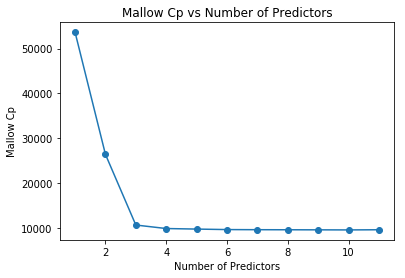

In [37]:
plt.scatter(temp.index, temp.Cp)
plt.plot(temp.index, temp.Cp)
plt.title('Mallow Cp vs Number of Predictors')
plt.xlabel('Number of Predictors')
plt.ylabel('Mallow Cp')

## AIC (AKaike Information Criterion)

AIC is similar to Mallow's Cp. It is defined for a large class of models fit by maximum likelihood. It is calculated using this following formula. This omited an additive constant. Hence for least squares models, Cp and AIC are proportional to each other

$$ AIC= \frac{1}{n\hat{\sigma}^2 }(RSS+2d\hat{\sigma}^2 ) $$

In [41]:
temp['AIC'] = (1/m* hat_sigma_squared) *(temp.RSS+2*temp.index *hat_sigma_squared)

Text(0,0.5,'AIC')

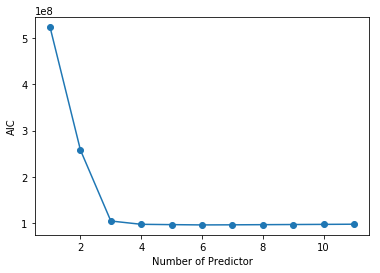

In [45]:
plt.scatter(temp.index, temp.AIC)
plt.plot(temp.index, temp.AIC)
plt.xlabel('Number of Predictor')
plt.ylabel('AIC')

## BIC (Bayesian Information Criterion)

BIC was derived from a Bayesian point of view, but ends up looking similar to Cp and AIC. For the least squares model with d predictors, the BIC is, up to irrelevant constants, given by

$$ BIC= \frac{1}{n}(RSS+ log(n)d\hat{\sigma}^2) $$

Text(0,0.5,'BIC')

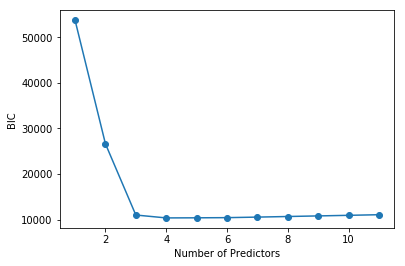

In [52]:
import math
temp['BIC'] = 1/m *(temp.RSS + math.log(m)*temp.index * hat_sigma_squared)
plt.scatter(temp.index, temp.BIC)
plt.plot(temp.index, temp.BIC)
plt.xlabel('Number of Predictors')
plt.ylabel('BIC')

# Shrinkage Methods(Regularization)

Two popular Regularization methods- Ridge and Lasso (sometimes elastic-net is also popular, but not as much as ridge and lasso)

## Ridge Regression

In [59]:
#load Hitters Dataset
df= pd.read_csv('Dataset/Hitters.csv').dropna()

In [60]:
df.head()

,Unnamed: 0,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,...,CRuns,CRBI,CWalks,League,Division,PutOuts,Assists,Errors,Salary,NewLeague
1,-Alan Ashby,315,81,7,24,38,39,14,3449,835,...,321,414,375,N,W,632,43,10,475.0,N
2,-Alvin Davis,479,130,18,66,72,76,3,1624,457,...,224,266,263,A,W,880,82,14,480.0,A
3,-Andre Dawson,496,141,20,65,78,37,11,5628,1575,...,828,838,354,N,E,200,11,3,500.0,N
4,-Andres Galarraga,321,87,10,39,42,30,2,396,101,...,48,46,33,N,E,805,40,4,91.5,N
5,-Alfredo Griffin,594,169,4,74,51,35,11,4408,1133,...,501,336,194,A,W,282,421,25,750.0,A


In [61]:
df.describe()

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,PutOuts,Assists,Errors,Salary
count,263.000000,263.000000,263.000000,263.000000,263.000000,263.000000,263.000000,263.000000,263.000000,263.000000,263.000000,263.000000,263.000000,263.000000,263.000000,263.000000,263.000000
mean,403.642586,107.828897,11.619772,54.745247,51.486692,41.114068,7.311787,2657.543726,722.186312,69.239544,361.220532,330.418251,260.266160,290.711027,118.760456,8.593156,535.925882
std,147.307209,45.125326,8.757108,25.539816,25.882714,21.718056,4.793616,2286.582929,648.199644,82.197581,331.198571,323.367668,264.055868,279.934575,145.080577,6.606574,451.118681
min,19.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,19.000000,4.000000,0.000000,2.000000,3.000000,1.000000,0.000000,0.000000,0.000000,67.500000
25%,282.500000,71.500000,5.000000,33.500000,30.000000,23.000000,4.000000,842.500000,212.000000,15.000000,105.500000,95.000000,71.000000,113.500000,8.000000,3.000000,190.000000
50%,413.000000,103.000000,9.000000,52.000000,47.000000,37.000000,6.000000,1931.000000,516.000000,40.000000,250.000000,230.000000,174.000000,224.000000,45.000000,7.000000,425.000000
75%,526.000000,141.500000,18.000000,73.000000,71.000000,57.000000,10.000000,3890.500000,1054.000000,92.500000,497.500000,424.500000,328.500000,322.500000,192.000000,13.000000,750.000000
max,687.000000,238.000000,40.000000,130.000000,121.000000,105.000000,24.000000,14053.000000,4256.000000,548.000000,2165.000000,1659.000000,1566.000000,1377.000000,492.000000,32.000000,2460.000000


In [62]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 263 entries, 1 to 321
Data columns (total 21 columns):
Unnamed: 0    263 non-null object
AtBat         263 non-null int64
Hits          263 non-null int64
HmRun         263 non-null int64
Runs          263 non-null int64
RBI           263 non-null int64
Walks         263 non-null int64
Years         263 non-null int64
CAtBat        263 non-null int64
CHits         263 non-null int64
CHmRun        263 non-null int64
CRuns         263 non-null int64
CRBI          263 non-null int64
CWalks        263 non-null int64
League        263 non-null object
Division      263 non-null object
PutOuts       263 non-null int64
Assists       263 non-null int64
Errors        263 non-null int64
Salary        263 non-null float64
NewLeague     263 non-null object
dtypes: float64(1), int64(16), object(4)
memory usage: 45.2+ KB


In [63]:
df['Salary'].isnull().sum()

0

In [64]:
df.League.value_counts()

A    139
N    124
Name: League, dtype: int64

In [65]:
dummies = pd.get_dummies(df[['League', 'Division', 'NewLeague']])

In [66]:
y= df.Salary
X_ = df.drop(['League', 'Division', 'NewLeague', 'Salary','Unnamed: 0'],axis =1).astype('float64')
X= pd.concat([X_, dummies[['League_N', 'Division_E', 'NewLeague_N']]],axis =1)

In [67]:
X.columns

Index(['AtBat', 'Hits', 'HmRun', 'Runs', 'RBI', 'Walks', 'Years', 'CAtBat',
       'CHits', 'CHmRun', 'CRuns', 'CRBI', 'CWalks', 'PutOuts', 'Assists',
       'Errors', 'League_N', 'Division_E', 'NewLeague_N'],
      dtype='object')

In [68]:
X.head()

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,PutOuts,Assists,Errors,League_N,Division_E,NewLeague_N
1,315.0,81.0,7.0,24.0,38.0,39.0,14.0,3449.0,835.0,69.0,321.0,414.0,375.0,632.0,43.0,10.0,1,0,1
2,479.0,130.0,18.0,66.0,72.0,76.0,3.0,1624.0,457.0,63.0,224.0,266.0,263.0,880.0,82.0,14.0,0,0,0
3,496.0,141.0,20.0,65.0,78.0,37.0,11.0,5628.0,1575.0,225.0,828.0,838.0,354.0,200.0,11.0,3.0,1,1,1
4,321.0,87.0,10.0,39.0,42.0,30.0,2.0,396.0,101.0,12.0,48.0,46.0,33.0,805.0,40.0,4.0,1,1,1
5,594.0,169.0,4.0,74.0,51.0,35.0,11.0,4408.0,1133.0,19.0,501.0,336.0,194.0,282.0,421.0,25.0,0,0,0


In [69]:
X.shape[1]

19

In [70]:
#very very slow to run this

#lm= LinearRegression()
#efs = EFS(lm,min_features=1, max_features=19, scoring='neg_mean_squared_error',print_progress=True, cv=5)
#efsfit= efs.fit(X,y)
#print('Best negtive mean squared error: %.2f' % efsfit.best_score_)

## Forward Subset Selection

In [71]:
from mlxtend.feature_selection import SequentialFeatureSelector as SFS

In [90]:
lm= LinearRegression()
sfs1 = SFS(lm,
           k_features=7,
           forward=True,
           floating=False,
           verbose=2,
           scoring='neg_mean_squared_error',
           cv=5)

sfs1.fit(X,y)

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  19 out of  19 | elapsed:    0.2s finished

[2019-04-16 14:24:22] Features: 1/7 -- score: -142142.865462403[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  18 out of  18 | elapsed:    0.1s finished

[2019-04-16 14:24:22] Features: 2/7 -- score: -124277.83941532117[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  17 out of  17 | elapsed:    0.1s finished

[2019-04-16 14:24:22] Features: 3/7 -- score: -120082.1567462722[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  16 out of  16 | elapsed:    0.1s finished

[2019-04-16 14:24:22] Features: 4/7 -- score: -117217.98393288904[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  15 out of  15 | elapsed:    0.1

SequentialFeatureSelector(clone_estimator=True, cv=5,
             estimator=LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False),
             floating=False, forward=True, k_features=7, n_jobs=1,
             pre_dispatch='2*n_jobs', scoring='neg_mean_squared_error',
             verbose=2)

In [91]:
sfs1.subsets_

{1: {'feature_idx': (11,),
  'cv_scores': array([ -69552.92336717, -213009.92207213, -118946.76030707,
         -207644.13810831, -101560.58345733]),
  'avg_score': -142142.865462403,
  'feature_names': ('CRBI',)},
 2: {'feature_idx': (1, 11),
  'cv_scores': array([ -53798.49669675, -163254.8070404 , -104610.93335577,
         -201906.21884294,  -97818.74114074]),
  'avg_score': -124277.83941532117,
  'feature_names': ('Hits', 'CRBI')},
 3: {'feature_idx': (1, 11, 17),
  'cv_scores': array([ -62163.90514053, -153941.83393405,  -97468.14894897,
         -191620.10821684,  -95216.78749097]),
  'avg_score': -120082.1567462722,
  'feature_names': ('Hits', 'CRBI', 'Division_E')},
 4: {'feature_idx': (1, 11, 13, 17),
  'cv_scores': array([ -65576.39003923, -141278.46897399,  -82554.98231355,
         -188319.24800473, -108360.83033295]),
  'avg_score': -117217.98393288904,
  'feature_names': ('Hits', 'CRBI', 'PutOuts', 'Division_E')},
 5: {'feature_idx': (0, 1, 11, 13, 17),
  'cv_scores': ar

## Backward Subset Selection

In [95]:
sfs2 = SFS(lm,
           k_features=7,
           forward=False,
           floating=False,
           verbose=2,
           scoring='neg_mean_squared_error',
           cv=5)

sfs2.fit(X.values,y)

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  19 out of  19 | elapsed:    0.2s finished

[2019-04-16 14:26:50] Features: 18/7 -- score: -118980.27868752561[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  18 out of  18 | elapsed:    0.1s finished

[2019-04-16 14:26:50] Features: 17/7 -- score: -117604.40985668839[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  17 out of  17 | elapsed:    0.1s finished

[2019-04-16 14:26:50] Features: 16/7 -- score: -116518.59452589511[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  16 out of  16 | elapsed:    0.1s finished

[2019-04-16 14:26:50] Features: 15/7 -- score: -115875.63685350744[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  15 out of  15 | elapsed:

SequentialFeatureSelector(clone_estimator=True, cv=5,
             estimator=LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False),
             floating=False, forward=False, k_features=7, n_jobs=1,
             pre_dispatch='2*n_jobs', scoring='neg_mean_squared_error',
             verbose=2)

In [96]:
print('\nSequential Backward Selection (k=7):')
print(sfs2.k_feature_idx_)
print('CV Score:')
print(sfs2.k_score_)


Sequential Backward Selection (k=7):
(0, 1, 5, 10, 11, 13, 17)
CV Score:
-112446.76724753054


## Ridge Regression

In [101]:
from sklearn.preprocessing import scale 
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
X_train, X_test, y_train, y_Test = train_test_split(X,y, test_size =0.5, random_state =1)

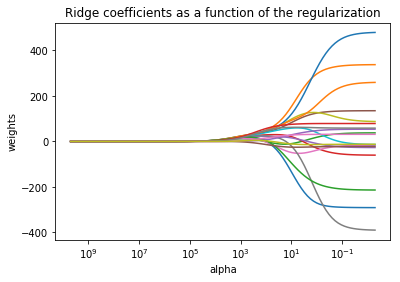

In [102]:
from sklearn.linear_model import Ridge
alphas = 10**np.linspace(10,-2,100)*0.5
ridge = Ridge()
coefs = []

for a in alphas:
    ridge.set_params(alpha=a)
    ridge.fit(scale(X), y)
    coefs.append(ridge.coef_)

ax = plt.gca()
ax.plot(alphas, coefs)
ax.set_xscale('log')
ax.set_xlim(ax.get_xlim()[::-1])  # reverse axis
plt.axis('tight')
plt.xlabel('alpha')
plt.ylabel('weights')
plt.title('Ridge coefficients as a function of the regularization');